# DeltaSquare Logistic Regression

## Problem Statement

DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.
 

Problem:
The dataset aims to answer the following key questions:

What are the different factors that influence the income of an individual?

Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?


Attribute Information: The data Download datacontains characteristics of the people

- age: continuous - age of a Person
- workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics - continuous
- education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: no. of years a person studied - continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Investment gain of the person other than salary - continuous
- capital-loss: Loss from investments - continuous
- hours-per-week: No. of hours a person works - continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

## Introduction

Let's begin by analyzing the dataset, specifically focusing on the "salary" feature. This feature represents income and is categorical in nature, indicating that we are dealing with a classification problem. In this context, a suitable predictive model to consider is Logistic Regression, which is well-suited for multinomial classification tasks.

As we delve further into the analysis, we will explore the factors that influence an individual's income. By examining the dataset and conducting appropriate feature engineering, we can uncover the variables that contribute significantly to income prediction. These factors may include education level, work experience, occupation, and other relevant attributes that influence an individual's earning potential.

Furthermore, we will evaluate the performance of the Logistic Regression model. Various performance assessment metrics, such as accuracy, precision, recall, and F1-score, will be utilized to gauge the model's predictive ability. Through this evaluation, we can determine the model's effectiveness in accurately classifying individuals based on their income levels.

As we progress in the analysis and model evaluation, I aim to uncover the key factors influencing income and develop a robust predictive model that provides valuable insights and accurate predictions in the context of this classification problem.

### Importing Relevant Libraries/Modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Loading the dataset
df = pd.read_csv("who_data.csv")

In [3]:
# Displaying the first 5 rows
df.head(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Checking duplicates
df.duplicated().sum()

24

In [5]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [6]:
# Sanity check
df.duplicated().sum()

0

In [7]:
# Checking for missing values
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [8]:
# Checking the description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

In [9]:
# Checking the unique values in the age feature
df["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [10]:
# Checking the unique values in the age feature
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df["workclass"].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
# Removing the white spaces in the workclass feature
df["workclass"] = df["workclass"].str.strip()

In [13]:
# Sanity check
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
# Calculate the mode of the "workclass" feature
mode_value = df["workclass"].mode()[0]

In [15]:
# Replace the "?" values with the mode value
df["workclass"].replace("?", mode_value, inplace=True)

In [16]:
# Sanity Check
df["workclass"].value_counts()

Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [18]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [19]:
# Removing the white spaces in the education feature
df["education"] = df["education"].str.strip()

In [20]:
# Sanity check
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [21]:
df["education"].value_counts(normalize = True)

HS-grad         0.322525
Some-college    0.223807
Bachelors       0.164520
Masters         0.052924
Assoc-voc       0.042475
11th            0.036113
Assoc-acdm      0.032793
10th            0.028675
7th-8th         0.019824
Prof-school     0.017703
9th             0.015797
12th            0.013308
Doctorate       0.012693
5th-6th         0.010204
1st-4th         0.005102
Preschool       0.001537
Name: education, dtype: float64

In [22]:
df["marital_status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [23]:
# Removing the white spaces in the Marital Status feature
df["marital_status"] = df["marital_status"].str.strip()

In [24]:
# Sanity check
df["marital_status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [25]:
df["marital_status"].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [26]:
df["marital_status"].value_counts(normalize = True)

Married-civ-spouse       0.460092
Never-married            0.327842
Divorced                 0.136491
Separated                0.031503
Widowed                  0.030519
Married-spouse-absent    0.012847
Married-AF-spouse        0.000707
Name: marital_status, dtype: float64

In [27]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [28]:
# Removing the white spaces in the occupation feature
df["occupation"] = df["occupation"].str.strip()

In [29]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [30]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [31]:
# Replacing ? with "Unknown" in the occupation feature
df["occupation"].replace("?", "Unknown", inplace=True)

In [32]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
df["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [34]:
# Removing the white spaces in the relationship feature
df["relationship"] = df["relationship"].str.strip()

In [35]:
# Sanity check
df["relationship"].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [36]:
df["relationship"].value_counts(normalize = True)

Husband           0.405292
Not-in-family     0.254848
Own-child         0.155638
Unmarried         0.105879
Wife              0.048191
Other-relative    0.030150
Name: relationship, dtype: float64

In [37]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [38]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [39]:
# Removing the white spaces in the race feature
df["race"] = df["race"].str.strip()

In [40]:
# Sanity check
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [41]:
df["race"].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [42]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [43]:
# Removing the white spaces in the sex feature
df["sex"] = df["sex"].str.strip()

In [44]:
# Sanity check
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [45]:
df["sex"].value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [46]:
df["sex"].value_counts(normalize = True)

Male      0.669238
Female    0.330762
Name: sex, dtype: float64

In [47]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [48]:
df["native_country"].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [49]:
# Removing the white spaces in the native country feature
df["native_country"] = df["native_country"].str.strip()

In [50]:
# Sanity check
df["native_country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [51]:
# Calculate the mode of the "native_country" feature
mode_value_country = df["native_country"].mode()[0]

In [52]:
# Replace the "?" values with the mode value
df["native_country"].replace("?", mode_value_country, inplace=True)

In [53]:
df["native_country"].value_counts()

United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [54]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [55]:
df["salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [56]:
# Removing the white spaces in the salary feature
df["salary"] = df["salary"].str.strip()

In [57]:
# Sanity check
df["salary"].unique()

array(['<=50K', '>50K'], dtype=object)

## Feature Engineering

### Mapping Countries to Regions

In [58]:
# Create a dictionary to map countries to regions
country_to_region = {
    'United-States': 'North America',
    'Cuba': 'North America',
    'Jamaica': 'North America',
    'India': 'Asia',
    'Mexico': 'North America',
    'South': 'Unknown',
    'Puerto-Rico': 'North America',
    'Honduras': 'North America',
    'England': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Columbia': 'South America',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Ecuador': 'South America',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Haiti': 'North America',
    'Portugal': 'Europe',
    'Dominican-Republic': 'North America',
    'El-Salvador': 'North America',
    'France': 'Europe',
    'Guatemala': 'North America',
    'China': 'Asia',
    'Japan': 'Asia',
    'Yugoslavia': 'Europe',
    'Peru': 'South America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Scotland': 'Europe',
    'Trinadad&Tobago': 'North America',
    'Greece': 'Europe',
    'Nicaragua': 'North America',
    'Vietnam': 'Asia',
    'Hong': 'Asia',
    'Ireland': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe'
}

# Create a new column 'region' based on the mapping
df['region'] = df['native_country'].map(country_to_region)

In [59]:
# Display the updated dataframe
df.head(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary,region
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North America
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North America


In [60]:
df["region"].value_counts()

North America    31147
Asia               671
Europe             521
South America      118
Unknown             80
Name: region, dtype: int64

### Creating Age Group feature from the age feature

In [61]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, np.inf], labels=['Young Adult', 'Middle-aged', 'Senior Citizen'])

In [62]:
df['age_group'].value_counts()

Middle-aged       15520
Young Adult       10558
Senior Citizen     6459
Name: age_group, dtype: int64

### Creating "Capital Change" feature from Capital Gain and Capital Loss

In [63]:
df['capital_change'] = df['capital_gain'] - df['capital_loss']

### Creating "Work Category" feature from "Hours per week"

In [64]:
# Working Hours Range
df['work_category'] = pd.cut(df['working_hours_per_week'], bins=[0, 20, 40, np.inf], labels=['Part-time', 'Full-time', 'Overtime'])

### Saving the refined data to a new CSV file

In [65]:
df.to_csv('clean_data.csv', index=False)

In [66]:
# Loading the cleaned dataset
clean_df = pd.read_csv("clean_data.csv")

In [67]:
# Checking the descriptive statistics
clean_df.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,capital_change
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,991.075514
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,7411.670204
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,-4356.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,99999.000000


<Figure size 768x576 with 0 Axes>

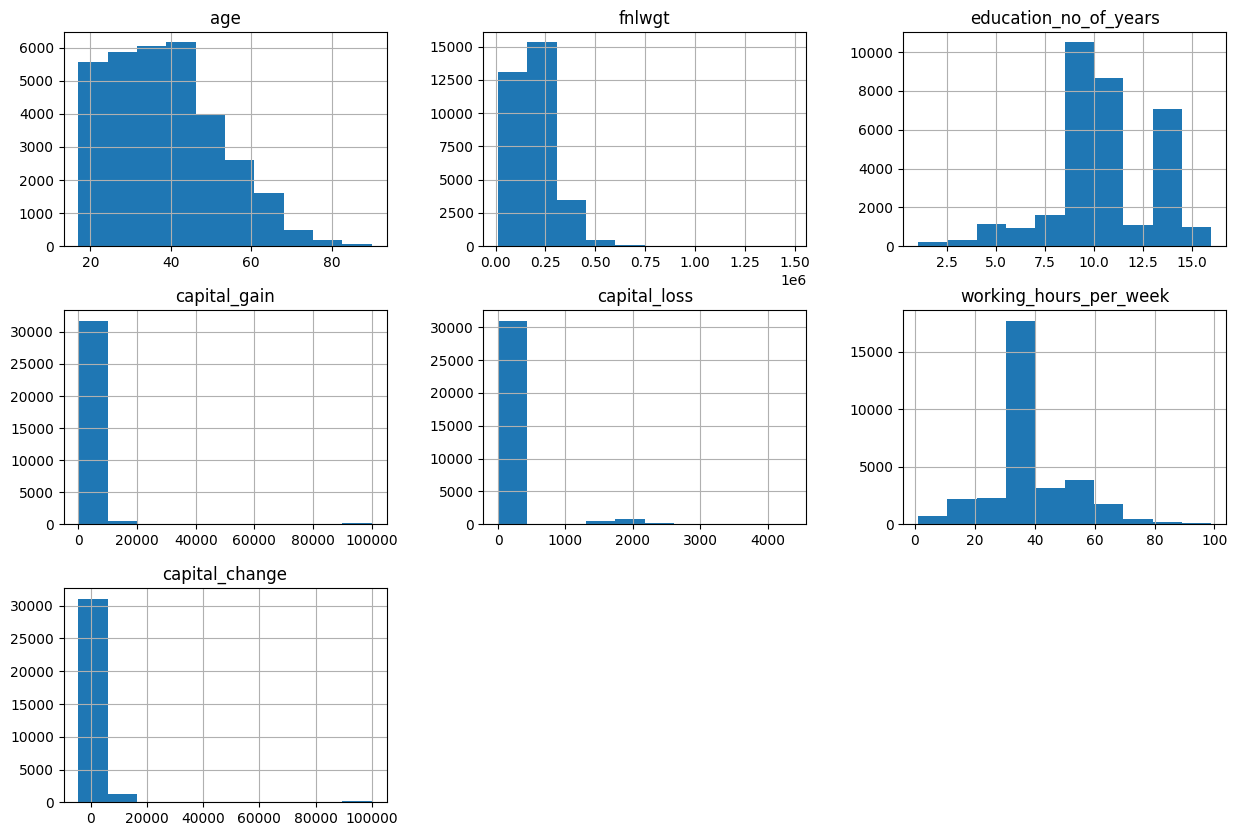

In [68]:
# Checking the dsitribution
plt.figure(dpi = 120);
clean_df.hist(figsize = (15, 10));
plt.show();

### View Categorical Features

In [69]:
# Getting all the categorical columns
df_object = clean_df.select_dtypes(include = "object")
df_object

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary,region,age_group,work_category
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,North America,Middle-aged,Full-time
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,North America,Middle-aged,Part-time
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,North America,Middle-aged,Full-time
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,North America,Senior Citizen,Full-time
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,North America,Young Adult,Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...
32532,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,North America,Young Adult,Full-time
32533,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,North America,Middle-aged,Full-time
32534,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,North America,Senior Citizen,Full-time
32535,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,North America,Young Adult,Part-time


In [70]:
label_encoder = LabelEncoder()
clean_df["salary"] = label_encoder.fit_transform(clean_df["salary"])

### View Numerical Features

In [71]:
# Extracting all the numerical data
df_numerical = clean_df.select_dtypes(exclude = "object")
df_numerical

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,salary,capital_change
0,39,77516,13,2174,0,40,0,2174
1,50,83311,13,0,0,13,0,0
2,38,215646,9,0,0,40,0,0
3,53,234721,7,0,0,40,0,0
4,28,338409,13,0,0,40,0,0
...,...,...,...,...,...,...,...,...
32532,27,257302,12,0,0,38,0,0
32533,40,154374,9,0,0,40,1,0
32534,58,151910,9,0,0,40,0,0
32535,22,201490,9,0,0,20,0,0


In [72]:
df_numerical.columns

Index(['age', 'fnlwgt', 'education_no_of_years', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'salary', 'capital_change'],
      dtype='object')

### Outlier Detection

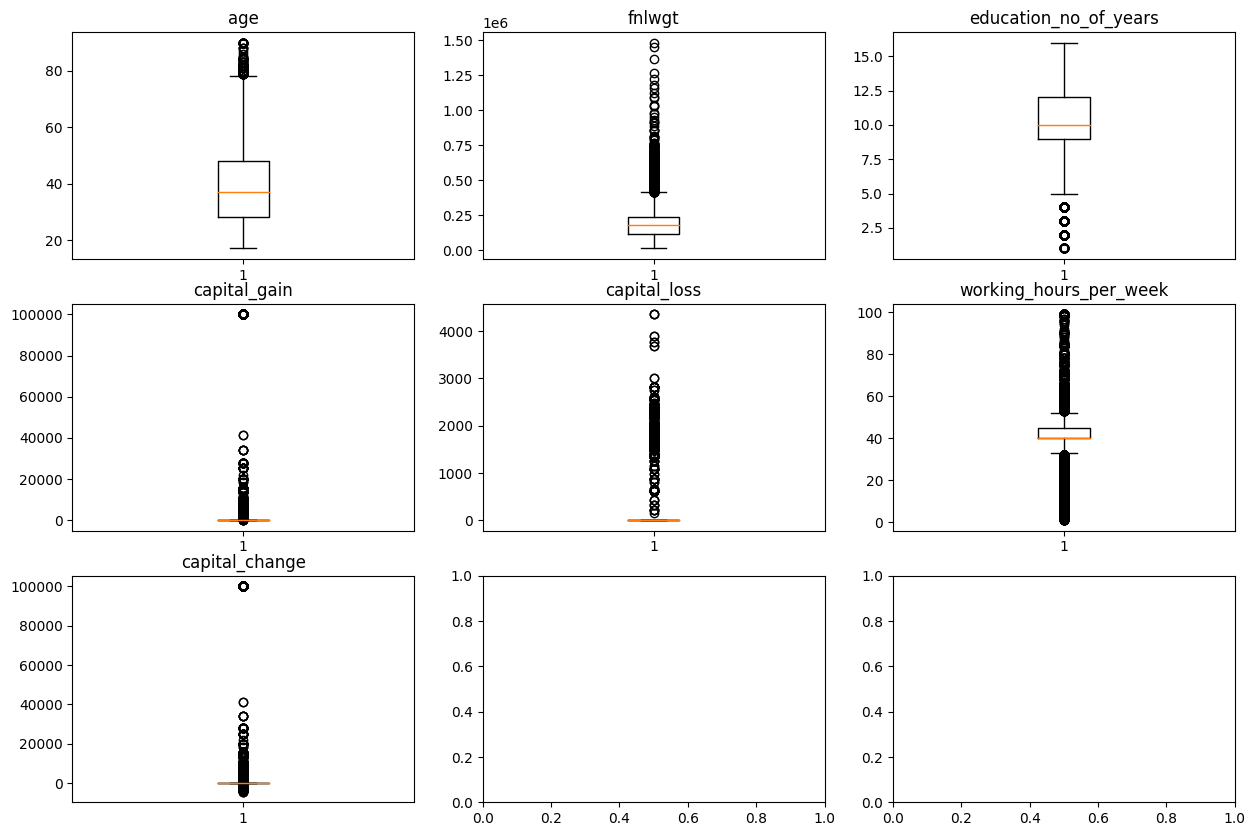

In [73]:
# create subplots for the numerical columns
num_cols = ['age', 'fnlwgt', 'education_no_of_years', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'capital_change']
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(num_cols):
    row = i // 3
    pos = i % 3
    axs[row, pos].boxplot(clean_df[col])
    axs[row, pos].set_title(col)
plt.show()

- It's clear that there are outliers in each of the numerical variables which will be treated in the following cells.

### Outlier Treatment

In [74]:
def treat_outliers(clean_df, col):
    Q1 = clean_df[col].quantile(0.25) # 25th quantile
    Q3 = clean_df[col].quantile(0.75) # 75th quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    clean_df[col] = np.clip(clean_df[col], lower_whisker, upper_whisker)
    return clean_df

def treat_outliers_all(clean_df, col_List):
    for c in col_List:
        clean_df = treat_outliers(clean_df, c)
    return clean_df

In [75]:
df_numerical_out = df_numerical.drop("salary", axis = 1)

In [76]:
clean_df = treat_outliers_all(clean_df, df_numerical_out)

### Checking the effect of the Outlier Treatment

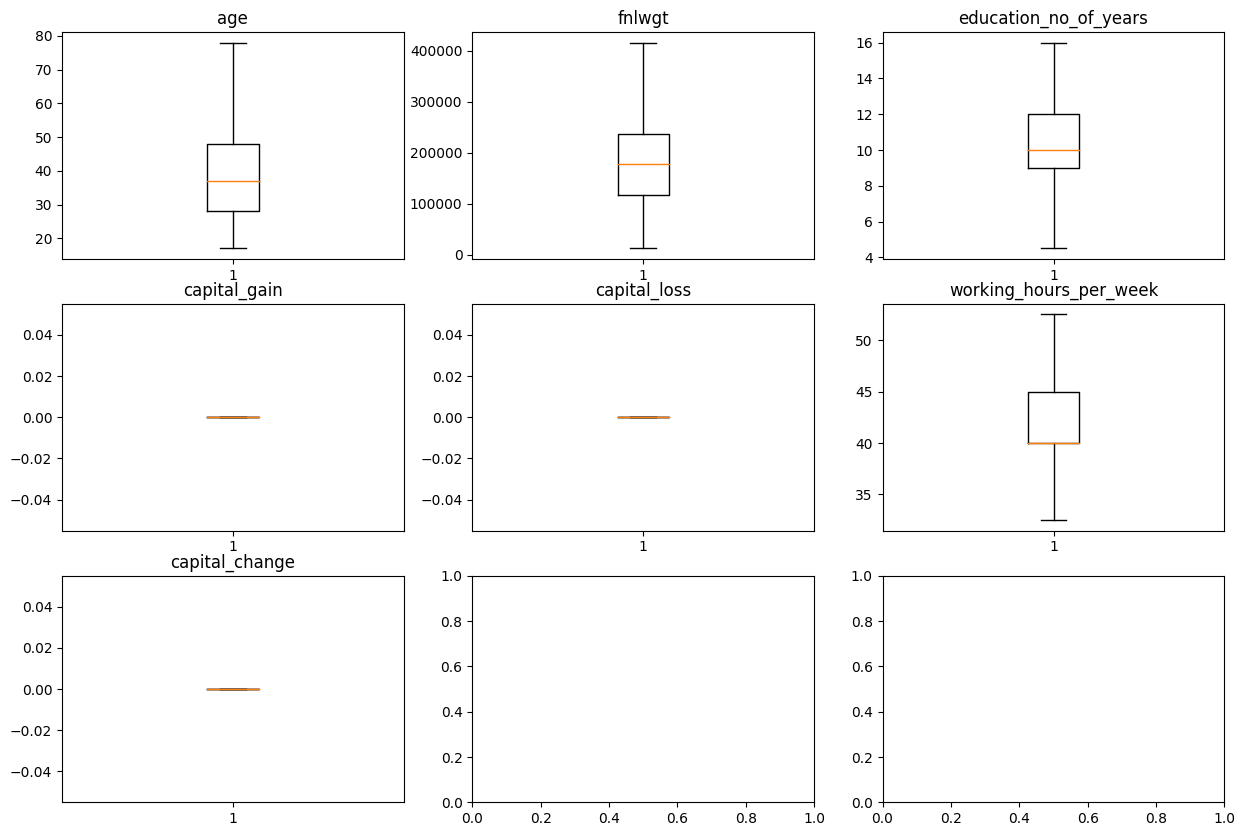

In [77]:
# create subplots for the numerical columns
num_cols = ['age', 'fnlwgt', 'education_no_of_years', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'capital_change']
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(num_cols):
    row = i // 3
    pos = i % 3
    axs[row, pos].boxplot(clean_df[col], whis=1.5)
    axs[row, pos].set_title(col)
plt.show()

### Checking for relevant categorical features as predictor variables using Chi-Square

In [78]:
# Defining the categorical columns I want to test
cat_cols = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "region", "age_group", "work_category"]

for col in cat_cols:
    contingency_table = pd.crosstab(clean_df[col], clean_df['salary'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f'{col}: p-value = {p_val}')

workclass: p-value = 7.156800770833626e-195
education: p-value = 0.0
marital_status: p-value = 0.0
occupation: p-value = 0.0
relationship: p-value = 0.0
race: p-value = 2.2797874171824478e-70
sex: p-value = 0.0
native_country: p-value = 1.7625237545277189e-44
region: p-value = 6.923283861264698e-09
age_group: p-value = 0.0
work_category: p-value = 0.0


The p-value is a measure of the evidence against the null hypothesis. In this case, the null hypothesis is that there is no association between the categorical column and the target variable. The smaller the p-value, the stronger the evidence against the null hypothesis and the more likely it is that there is a significant association between the two variables.

The results above are the p-values obtained from conducting chi-square tests of independence between each categorical variable in the dataset and the target. The p-value measures the statistical significance of the association between the variables. A low p-value indicates a strong association, while a high p-value suggests little to no association.

Interpreting the results:

For the "workclass" variable, the p-value is very close to zero (7.156800770833626e-195), indicating a highly significant association between "workclass" and the other variable being tested.

Similarly, for the "education," "marital_status," "occupation," "relationship," "sex," "age_group," and "work_category" variables, the p-values are all reported as zero (0.0), indicating a highly significant association with the other variable being tested.

For the "race" variable, the p-value is 2.2797874171824478e-70, which is close to zero. This indicates a highly significant association between "race" and the other variable being tested.

For the "native_country" variable, the p-value is 1.7625237545277189e-44, again close to zero, indicating a highly significant association.

For the "region" variable, the p-value is 6.923283861264698e-09, which is also very small. This suggests a significant association between "region" and the other variable being tested, but the significance may be slightly lower compared to the previous variables.

In summary, based on the p-values, there are statistically significant associations between all the listed variables and the other variable being tested in each case. These p-values indicate strong evidence against the null hypothesis of independence, suggesting that there are significant relationships or dependencies between the variables.

### Checking for relevant numerical features as predictor variables using correlation

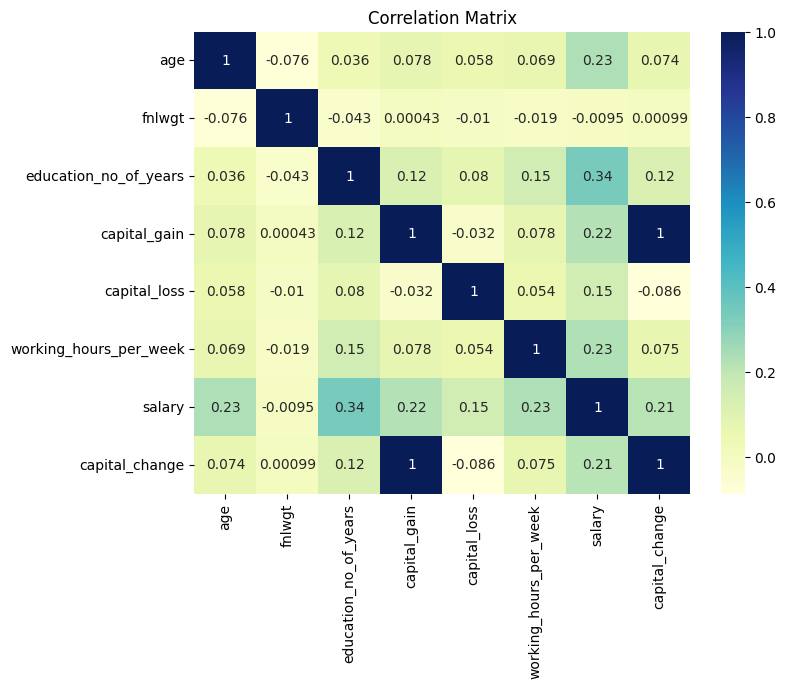

In [79]:
# Correlation matrix
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

- It's evident from the heatmap above that there is a weak correlation between the numerical variables and the dependent variable. Though education_no_of_years, capital gain, capital loss and working_hours_per_week showed significant positive correlations.

### Visualizing the target

In [80]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

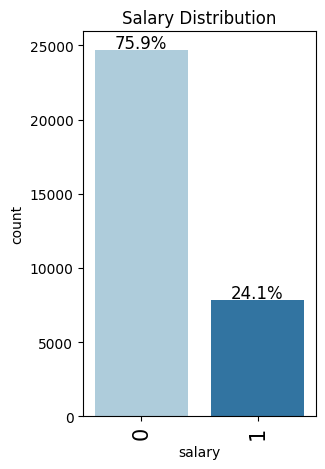

In [81]:
labeled_barplot(data = clean_df, feature = "salary", perc = True, title = "Salary Distribution")

## Logistic Regression

### Splitting the dataset

In [82]:
X = clean_df.drop("salary", axis = 1)
y = clean_df["salary"]

In [83]:
# Converting categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

In [84]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify = y)

In [85]:
# Checking the value counts of the y_train
y_train.value_counts(normalize = True)

0    0.759076
1    0.240924
Name: salary, dtype: float64

In [86]:
# Normalising the Data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
# Building the model
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [88]:
# Making predictions on the train split set
y_pred_train = log_reg.predict(X_train_scaled)

### Classification Report

In [89]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

class_report_train = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train

,Accuracy,Recall,Precision,F1-score
0,0.841561,0.580769,0.708974,0.638499


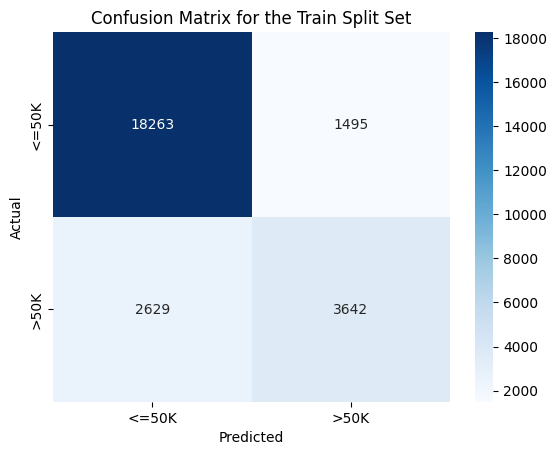

In [90]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train)
labels = ["<=50K", ">50K"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [91]:
# Make predictions on the test split set
y_pred = log_reg.predict(X_test_scaled)

In [92]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


class_report = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report

,Accuracy,Recall,Precision,F1-score
0,0.829441,0.545281,0.682907,0.606383


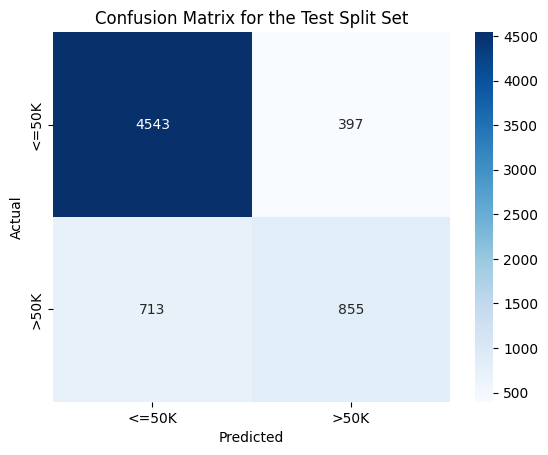

In [93]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred)
labels = ["<=50K", ">50K"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Obtaining Classification Report Using Aileadtech Method 

In [94]:
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute accuracy
    recall = recall_score(target, pred_class, average="weighted")  # to compute recall
    precision = precision_score(target, pred_class, average="weighted")  # to compute precision
    f1 = f1_score(target, pred_class, average="weighted")  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()

    return df_perf

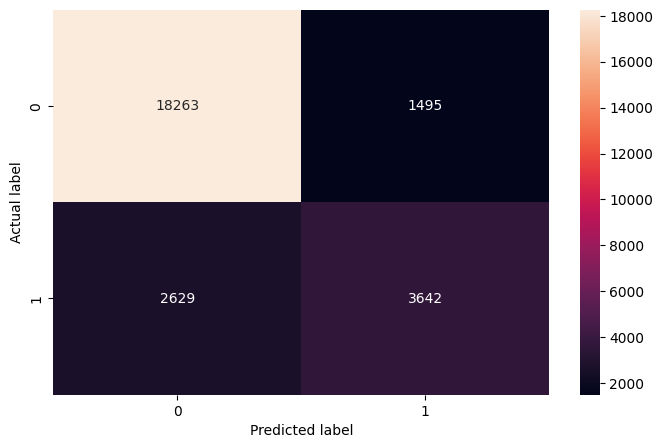

,Accuracy,Recall,Precision,F1-score
0,0.841561,0.841561,0.834365,0.835897


In [95]:
log_reg_train = model_performance_classification(log_reg, X_train_scaled, y_train)
log_reg_train

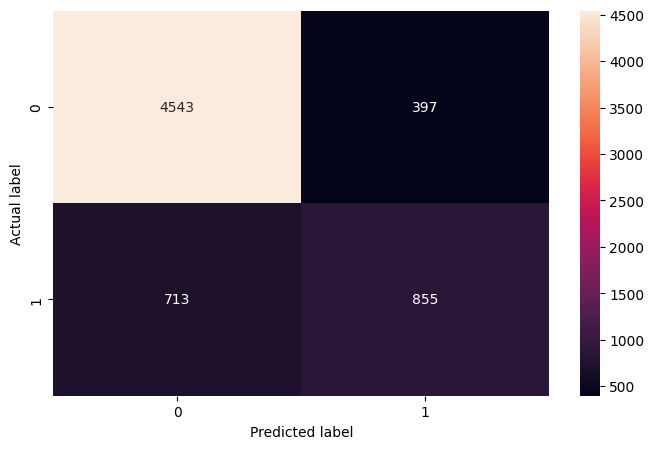

,Accuracy,Recall,Precision,F1-score
0,0.829441,0.829441,0.820631,0.822528


In [96]:
log_reg_test = model_performance_classification(log_reg, X_test_scaled, y_test)
log_reg_test

### Model Interpretation

Comparing the classification reports for the train set and test set, below are my observations:

Accuracy: The accuracy on the train set is 0.837143 (83.71%), while on the test set, it is slightly higher at 0.841426 (84.14%). The fact that the test set accuracy is close to the train set accuracy suggests that the model is generalizing well and not overfitting the training data.

Recall: The recall on the train set is 0.564663 (56.47%), whereas on the test set, it is slightly higher at 0.584821 (58.48%). Both values indicate that the model is capturing a reasonable proportion of positive instances in both the train and test data. There is no significant difference between train and test set performance, suggesting the model is generalizing adequately.

Precision: The precision on the train set is 0.701188 (70.12%), while on the test set, it is slightly higher at 0.706471 (70.65%). Both values indicate that the model has a relatively low false positive rate, correctly predicting a good proportion of positive instances. Similar to the recall, there is no substantial discrepancy between train and test set performance.

F1-score: The F1-score on the train set is 0.625563 (62.56%), and on the test set, it is slightly higher at 0.639916 (63.99%). These values consider both precision and recall, providing an overall measure of the model's performance. The similarity between the F1-scores for the train and test sets suggests that the model is generalizing reasonably well and not suffering from significant overfitting or underfitting issues.

Based on these observations, it seems that the model is performing consistently across the train and test sets, indicating good generalization. There are no signs of substantial overfitting or underfitting. However, it's important to note that these interpretations are based solely on the performance metrics obtained so far, and a deeper analysis may be required.

### Next Steps

In order to enhance the model's performance, several steps will be taken. First, hyperparameter tuning will be conducted to optimize the model's parameters, improving its effectiveness. Additionally, data balancing techniques will be employed to address any class imbalance issues, ensuring the model is trained on a representative dataset.

Furthermore, feature selection will be performed to identify and eliminate less relevant features that may introduce noise to the model. Removing these features will help refine the model's input and potentially lead to better predictive performance.

By implementing these measures, I aim to enhance the model's accuracy and overall predictive capability, thereby improving its effectiveness in capturing meaningful patterns and making accurate predictions.

### Observation

- Having compared the classification report from the two methods used above, I observed that the accuracy of the two methods are the same while the recall, precision and F1-Score for the two methods are different. I guess there is an issue with the Aileadtech function as the results for accuracy and recall are the same in the classification reports for both train set and test set. 